In [1]:
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras import layers, models



In [2]:
def snr_loss(y_pred, y_true, eps=1e-8):
    """
    Signal-to-Noise Ratio (SNR) Loss.
    Args:
        y_pred: Predicted spectrogram (batch, time, frequency).
        y_true: Ground truth spectrogram (batch, time, frequency).
        eps: Small constant to avoid division by zero.
    Returns:
        SNR loss (negative SNR value).
    """
    # Flatten the tensors
    y_pred_flat = tf.reshape(y_pred, [tf.shape(y_pred)[0], -1])
    y_true_flat = tf.reshape(y_true, [tf.shape(y_true)[0], -1])
    
    # Compute dot products
    target_energy = tf.reduce_sum(y_true_flat * y_true_flat, axis=1, keepdims=True)
    projection = tf.reduce_sum(y_pred_flat * y_true_flat, axis=1, keepdims=True)
    
    # Compute signal and noise energies
    signal = (projection / (target_energy + eps)) * y_true_flat
    noise = y_pred_flat - signal
    
    signal_power = tf.reduce_sum(signal * signal, axis=1)
    noise_power = tf.reduce_sum(noise * noise, axis=1)
    
    # Compute SNR
    snr = 10 * tf.math.log((signal_power + eps) / (noise_power + eps)) / tf.math.log(10.0)
    
    # Return negative SNR as loss (we want to maximize SNR)
    return -tf.reduce_mean(snr)

In [3]:
clean_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Clean\spectrogram'
noise_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Noise\spectrogram'

clean_spect_paths = os.listdir(clean_dir)
noise_spect_paths = os.listdir(noise_dir)

for i, j in zip(clean_spect_paths, noise_spect_paths):
    print(i,j)
    if i != j:
        print('not equal')

100_0.npy 100_0.npy
100_1.npy 100_1.npy
100_2.npy 100_2.npy
100_3.npy 100_3.npy
101_0.npy 101_0.npy
101_1.npy 101_1.npy
101_2.npy 101_2.npy
101_3.npy 101_3.npy
101_4.npy 101_4.npy
102_0.npy 102_0.npy
102_1.npy 102_1.npy
102_2.npy 102_2.npy
102_3.npy 102_3.npy
103_0.npy 103_0.npy
103_1.npy 103_1.npy
103_2.npy 103_2.npy
103_3.npy 103_3.npy
104_0.npy 104_0.npy
104_1.npy 104_1.npy
104_2.npy 104_2.npy
104_3.npy 104_3.npy
11_0.npy 11_0.npy
11_1.npy 11_1.npy
12_0.npy 12_0.npy
12_1.npy 12_1.npy
13_0.npy 13_0.npy
13_1.npy 13_1.npy
14_0.npy 14_0.npy
14_1.npy 14_1.npy
15_0.npy 15_0.npy
15_1.npy 15_1.npy
16_0.npy 16_0.npy
16_1.npy 16_1.npy
17_0.npy 17_0.npy
17_1.npy 17_1.npy
17_2.npy 17_2.npy
18_0.npy 18_0.npy
18_1.npy 18_1.npy
18_2.npy 18_2.npy
18_3.npy 18_3.npy
18_4.npy 18_4.npy
19_0.npy 19_0.npy
19_1.npy 19_1.npy
19_2.npy 19_2.npy
19_3.npy 19_3.npy
19_4.npy 19_4.npy
1_0.npy 1_0.npy
1_1.npy 1_1.npy
1_2.npy 1_2.npy
1_3.npy 1_3.npy
1_4.npy 1_4.npy
201_0.npy 201_0.npy
202_0.npy 202_0.npy
203_0.npy 

In [4]:
clean_spect_paths = [os.path.join(clean_dir, i) for i in clean_spect_paths]
noise_spect_paths = [os.path.join(noise_dir, i) for i in noise_spect_paths]

print(clean_spect_paths[:5])
print()
print(noise_spect_paths[:5])

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\101_0.npy']

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowshi

(513, 313)


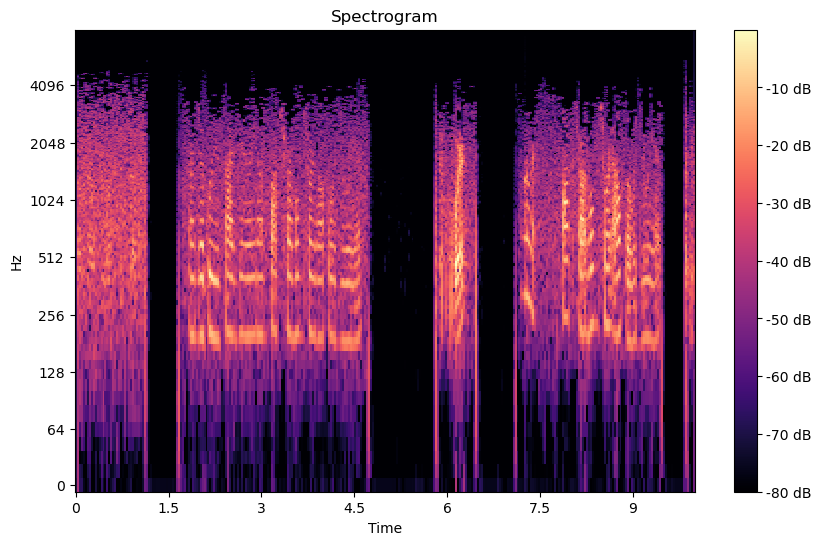

In [5]:
def plot_spectrogram(spectrogram, sr=16000, hop_length=512, title="Spectrogram"):
    """
    Visualizes a spectrogram using librosa and matplotlib.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    print(spectrogram.shape)
    plt.show()
plot_spectrogram(np.load(clean_spect_paths[0]))

In [6]:
from sklearn.model_selection import train_test_split
train_noisy, test_noisy, train_clean, test_clean = train_test_split(noise_spect_paths, clean_spect_paths, test_size=0.2, random_state=42)


In [7]:
train_data = tf.data.Dataset.from_tensor_slices((train_noisy, train_clean))
test_data = tf.data.Dataset.from_tensor_slices((test_noisy, test_clean))



In [8]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [noise_path], tf.float16))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [clean_path], tf.float16))
    
    # noise = tf.reshape(noise, (313, 513))
    # clean = tf.reshape(clean, (313, 513))
    return noise, clean



train_data = train_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)


batch_size = 2 # Choose an appropriate batch size for your model

# Batch the dataset
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Batch the dataset
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [9]:
for x, y in train_data.take(2):
    print(x.shape)

(2, 513, 313, 1)
(2, 513, 313, 1)


In [12]:


def build_compact_cnn_lstm_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder - 2 Conv2D layers
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)  # Downsample
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)  # Downsample

    # Temporal Processing with a Single LSTM
    encoded_shape = x.shape[1:]  # Save shape for reshaping back later
    x = layers.Reshape((-1, x.shape[-1]))(x)  # Flatten spatial dimensions
    x = layers.LSTM(64, return_sequences=True)(x)  # Single LSTM layer

    # Decoder - 2 Conv2DTranspose layers
    x = layers.Reshape((encoded_shape[0], encoded_shape[1], 64))(x)  # Reshape to match encoded dimensions
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # Upsample
    x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # Upsample

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    # outputs = layers.Cropping2D(cropping=((0,1), (0,1)))(outputs)
    outputs = layers.ZeroPadding2D(((0, 1), (0, 1)))(outputs) 
    return models.Model(inputs, outputs)

# Specify the input shape for the spectrograms
input_shape = ( 513, 313, 1)

# Build the compact model
compact_autoencoder = build_compact_cnn_lstm_autoencoder(input_shape)

# Compile the model
compact_autoencoder.compile(optimizer='adam', loss=snr_loss, metrics = ['mae', 'mse'])

# Summary
compact_autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 513, 313, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 513, 313, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 256, 156, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 156, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 78, 32)      0         
 2D)                                                             
                                                                 
 reshape_2 (Reshape)         (None, 9984, 32)          0   

In [13]:
history = compact_autoencoder.fit(train_data, epochs=20)

Epoch 1/20
124/124 [==============================] - 72s 555ms/step - loss: 1.9825 - mae: 0.4717 - mse: 6.0126
Epoch 2/20
124/124 [==============================] - 69s 559ms/step - loss: -2.8486 - mae: 0.4463 - mse: 6.1910
Epoch 3/20
124/124 [==============================] - 60s 484ms/step - loss: -3.7343 - mae: 0.4468 - mse: 6.1989
Epoch 4/20
124/124 [==============================] - 60s 486ms/step - loss: -4.3204 - mae: 0.4470 - mse: 6.2046
Epoch 5/20
124/124 [==============================] - 60s 484ms/step - loss: -4.7751 - mae: 0.4471 - mse: 6.2066
Epoch 6/20
124/124 [==============================] - 68s 547ms/step - loss: -5.0935 - mae: 0.4472 - mse: 6.2080
Epoch 7/20
124/124 [==============================] - 69s 554ms/step - loss: -5.3139 - mae: 0.4472 - mse: 6.2081
Epoch 8/20
124/124 [==============================] - 64s 519ms/step - loss: -5.5625 - mae: 0.4473 - mse: 6.2089
Epoch 9/20
124/124 [==============================] - 63s 505ms/step - loss: -5.7714 - mae: 0.447

In [35]:
print("Model output shape:", compact_autoencoder.output_shape)
for x, y in train_data.take(1):
    print(x.shape, y.shape)

Model output shape: (None, 313, 513, 1)
(2, 513, 313, 1) (2, 513, 313, 1)


Text(0.5, 1.0, 'loss')

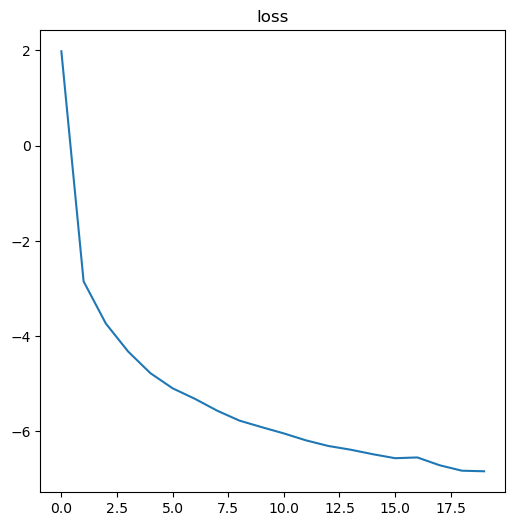

In [14]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'])
plt.title('loss')

Text(0.5, 1.0, 'mae')

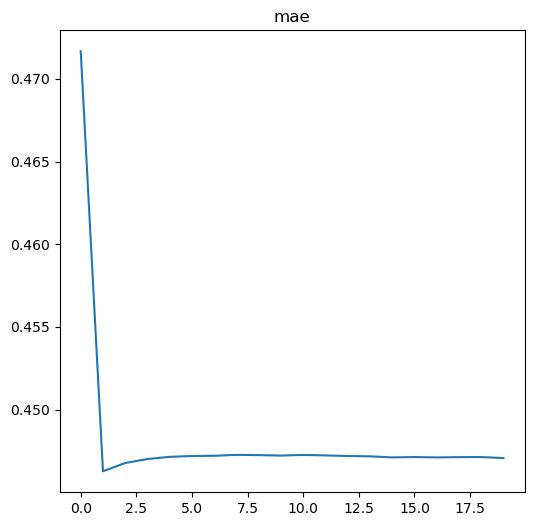

In [15]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mae'])
plt.title('mae')

Text(0.5, 1.0, 'mse')

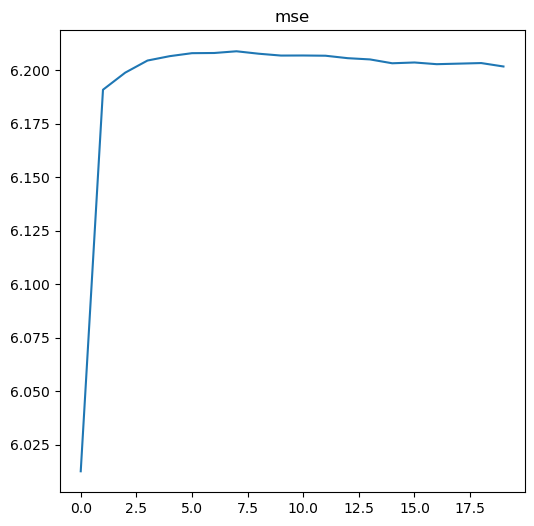

In [16]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mse'])
plt.title('mse')


In [17]:
compact_autoencoder.evaluate(test_data)

31/31 [==============================] - 9s 249ms/step - loss: -6.3298 - mae: 0.4250 - mse: 6.7238


[-6.329773426055908, 0.4250284731388092, 6.723768711090088]

In [18]:
denoised_output = compact_autoencoder.predict(test_data)

31/31 [==============================] - 8s 252ms/step


(313, 513)


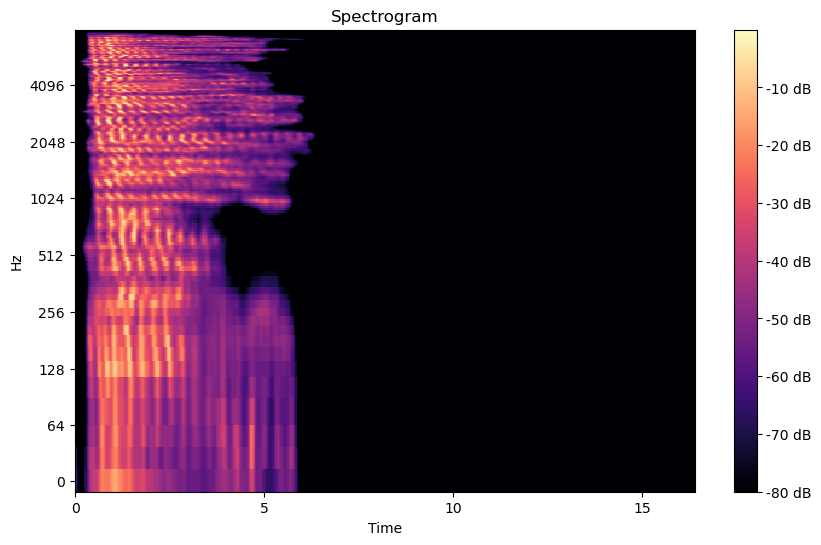

In [21]:
plot_spectrogram(np.transpose(np.squeeze(denoised_output[2])))
